In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read in the CSV
covid_data = pd.read_csv('./Covid Data.csv')

In [3]:
# Examine the data
print(covid_data.head())
print(covid_data.info())

# Check if there are any NaN values
if covid_data.isnull().values.any(): 
    print("\nThere are NaN values")
else:
    print("\nThere are no NaN values")

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

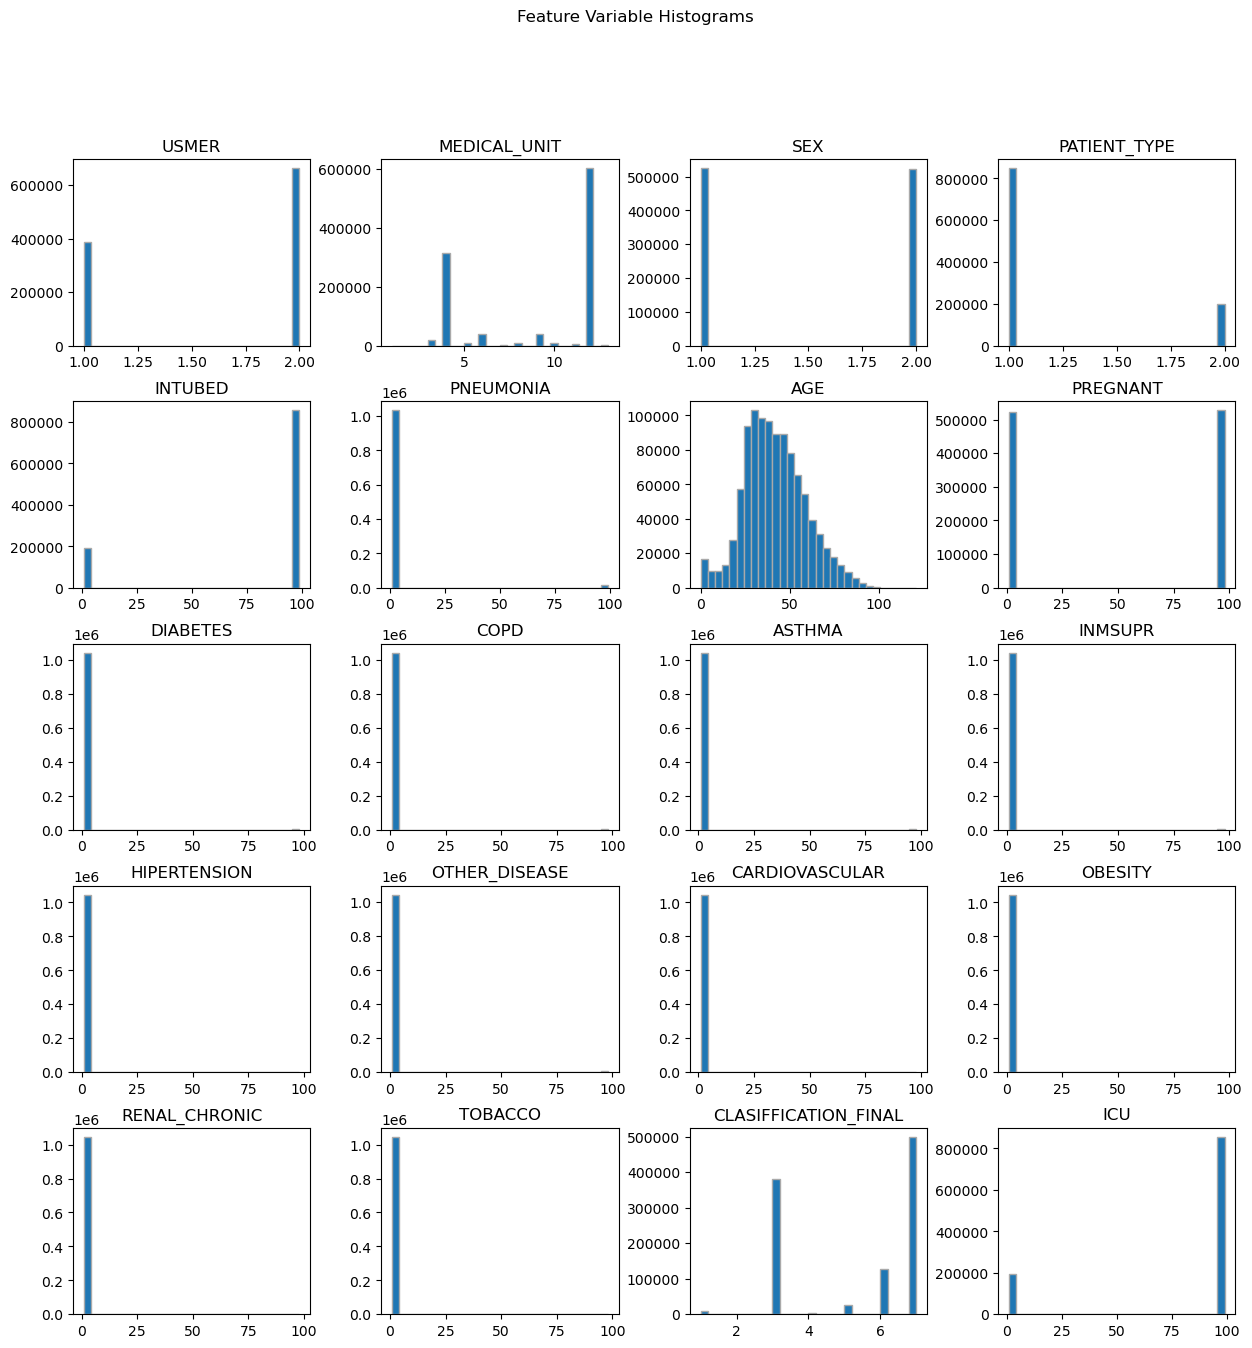

In [4]:
# Create histograms to examine each column in detail
fig, axs = plt.subplots(5, 4, figsize = (15, 15))
covid_data.hist(grid = False, ax = axs, bins = 30, edgecolor = "darkgrey")
plt.suptitle("Feature Variable Histograms")
plt.show()

In [5]:
# Although the dataframe doesn't have any NaN values, we know that values between 97 and 99 represent missing values in boolean features. 
# Create a list of columns that have values between 97-99
missing_val_col = []
for column in covid_data: 
    if any(i in covid_data[column].unique() for i in (97, 98, 99)):
        missing_val_col.append(column)
print(missing_val_col)

['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']


In [6]:
# Remove AGE from missing_val_col, since values of 97-99 are likely to be actual ages, rather than missing values
# Also remove PREGNANT, INTUBED, and ICU, as these have many missing values and need to be further examined
remove_features = ["AGE", "PREGNANT", "INTUBED", "ICU"]
missing_val_col = [ele for ele in missing_val_col if ele not in remove_features]
print(missing_val_col)

['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']


In [7]:
# Examine the pregnancy values for each gender
men = covid_data[covid_data["SEX"] == 2]
print("MEN:", men["PREGNANT"].unique())
female = covid_data[covid_data["SEX"] == 1]
print("WOMEN:", female["PREGNANT"].unique())

MEN: [97]
WOMEN: [ 2 98  1]


In [8]:
# As shown above, all men have values of 97. Change all 97's to 2's, since men can't become pregnant
covid_data["PREGNANT"] = covid_data["PREGNANT"].replace(97, 2)

# Check to see if this works
men = covid_data[covid_data["SEX"] == 2]
print("MEN:", men["PREGNANT"].unique())
female = covid_data[covid_data["SEX"] == 1]
print("WOMEN:", female["PREGNANT"].unique())

# Add PREGNANT back to missing_val_col
missing_val_col.append("PREGNANT")
print("\n", missing_val_col)

MEN: [2]
WOMEN: [ 2 98  1]

 ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'PREGNANT']


In [9]:
# Examine the intubed values for each patient type
patient_one = covid_data[covid_data["PATIENT_TYPE"] == 1]
print("NOT HOSPITALIZED:", patient_one['INTUBED'].unique())
patient_two = covid_data[covid_data['PATIENT_TYPE'] == 2]
print("HOSPITALIZED:", patient_two["INTUBED"].unique())

NOT HOSPITALIZED: [97]
HOSPITALIZED: [ 1  2 99]


In [10]:
# As shown above, all non-hospitalized patients have values of 97 
# Change these values to 2, since non-hospitalized patients can't be put on a ventilator
covid_data["INTUBED"] = covid_data["INTUBED"].replace(97, 2)

# Check to see if this works
patient_one = covid_data[covid_data["PATIENT_TYPE"] == 1]
print("NOT HOSPITALIZED:", patient_one['INTUBED'].unique())
patient_two = covid_data[covid_data['PATIENT_TYPE'] == 2]
print("HOSPITALIZED:", patient_two["INTUBED"].unique())

# Add PATIENT_TYPE back to missing_val_col
missing_val_col.append("INTUBED")
print("\n", missing_val_col)

NOT HOSPITALIZED: [2]
HOSPITALIZED: [ 1  2 99]

 ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'PREGNANT', 'INTUBED']


In [11]:
# Examine the ICU values for each patient type
print("NOT HOSPITALIZED:", patient_one["ICU"].unique())
print("HOSPITALIZED", patient_two["ICU"].unique())

NOT HOSPITALIZED: [97]
HOSPITALIZED [ 2  1 99]


In [12]:
# As shown above, all non-hospitalized patients have values of 97
# Change these values to 2, since non-hospitalized patients can't be put in the ICU
covid_data["ICU"] = covid_data["ICU"].replace(97, 2)

# Check to see if this works
patient_one = covid_data[covid_data["PATIENT_TYPE"] == 1]
print("NOT HOSPITALIZED:", patient_one["ICU"].unique())
patient_two = covid_data[covid_data['PATIENT_TYPE'] == 2]
print("HOSPITALIZED", patient_two["ICU"].unique())

# Add ICU back to missing_val_col
missing_val_col.append("ICU")
print("\n", missing_val_col)

NOT HOSPITALIZED: [2]
HOSPITALIZED [ 2  1 99]

 ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'PREGNANT', 'INTUBED', 'ICU']


In [13]:
# Change all 97's, 98's, and 99's to NaN
for column in missing_val_col:
    covid_data[column].replace([97, 98, 99], np.NaN, inplace=True)

# Check to see if this worked
print(covid_data.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      2.0        1.0   
1      2             1    2             1  03/06/2020      2.0        1.0   
2      2             1    2             2  09/06/2020      1.0        2.0   
3      2             1    1             1  12/06/2020      2.0        2.0   
4      2             1    2             1  21/06/2020      2.0        2.0   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65       2.0       2.0  ...     2.0      2.0           1.0            2.0   
1   72       2.0       2.0  ...     2.0      2.0           1.0            2.0   
2   55       2.0       1.0  ...     2.0      2.0           2.0            2.0   
3   53       2.0       2.0  ...     2.0      2.0           2.0            2.0   
4   68       2.0       1.0  ...     2.0      2.0           1.0            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

In [14]:
# Drop all rows with NaN
covid_data.dropna(inplace=True)
covid_data.reset_index(inplace=True, drop=True)

# Check to see if this worked
print(covid_data.head())
print(covid_data.info())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      2.0        1.0   
1      2             1    2             1  03/06/2020      2.0        1.0   
2      2             1    2             2  09/06/2020      1.0        2.0   
3      2             1    1             1  12/06/2020      2.0        2.0   
4      2             1    2             1  21/06/2020      2.0        2.0   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65       2.0       2.0  ...     2.0      2.0           1.0            2.0   
1   72       2.0       2.0  ...     2.0      2.0           1.0            2.0   
2   55       2.0       1.0  ...     2.0      2.0           2.0            2.0   
3   53       2.0       2.0  ...     2.0      2.0           2.0            2.0   
4   68       2.0       1.0  ...     2.0      2.0           1.0            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

In [15]:
# Create a new column, DEATH, which has a 1 for yes and 2 for no
covid_data["DEATH"] = np.where(covid_data["DATE_DIED"] == '9999-99-99', 2, 1)

# Remove the date died column, as this isn't important to the machine learning model
covid_data.drop(columns=["DATE_DIED"], inplace=True)

# Check to see if this works
print(covid_data)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  \
0            2             1    1             1      2.0        1.0   65   
1            2             1    2             1      2.0        1.0   72   
2            2             1    2             2      1.0        2.0   55   
3            2             1    1             1      2.0        2.0   53   
4            2             1    2             1      2.0        2.0   68   
...        ...           ...  ...           ...      ...        ...  ...   
1019661      2            13    2             1      2.0        2.0   40   
1019662      1            13    2             2      2.0        2.0   51   
1019663      2            13    2             1      2.0        2.0   55   
1019664      2            13    2             1      2.0        2.0   28   
1019665      2            13    2             1      2.0        2.0   52   

         PREGNANT  DIABETES  COPD  ...  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0      

In [16]:
# Check to see if this works
print(covid_data.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  PREGNANT  \
0      2             1    1             1      2.0        1.0   65       2.0   
1      2             1    2             1      2.0        1.0   72       2.0   
2      2             1    2             2      1.0        2.0   55       2.0   
3      2             1    1             1      2.0        2.0   53       2.0   
4      2             1    2             1      2.0        2.0   68       2.0   

   DIABETES  COPD  ...  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  \
0       2.0   2.0  ...      2.0           1.0            2.0             2.0   
1       2.0   2.0  ...      2.0           1.0            2.0             2.0   
2       1.0   2.0  ...      2.0           2.0            2.0             2.0   
3       2.0   2.0  ...      2.0           2.0            2.0             2.0   
4       1.0   2.0  ...      2.0           1.0            2.0             2.0   

   OBESITY  RENAL_CHRONIC  TOBACCO  CL

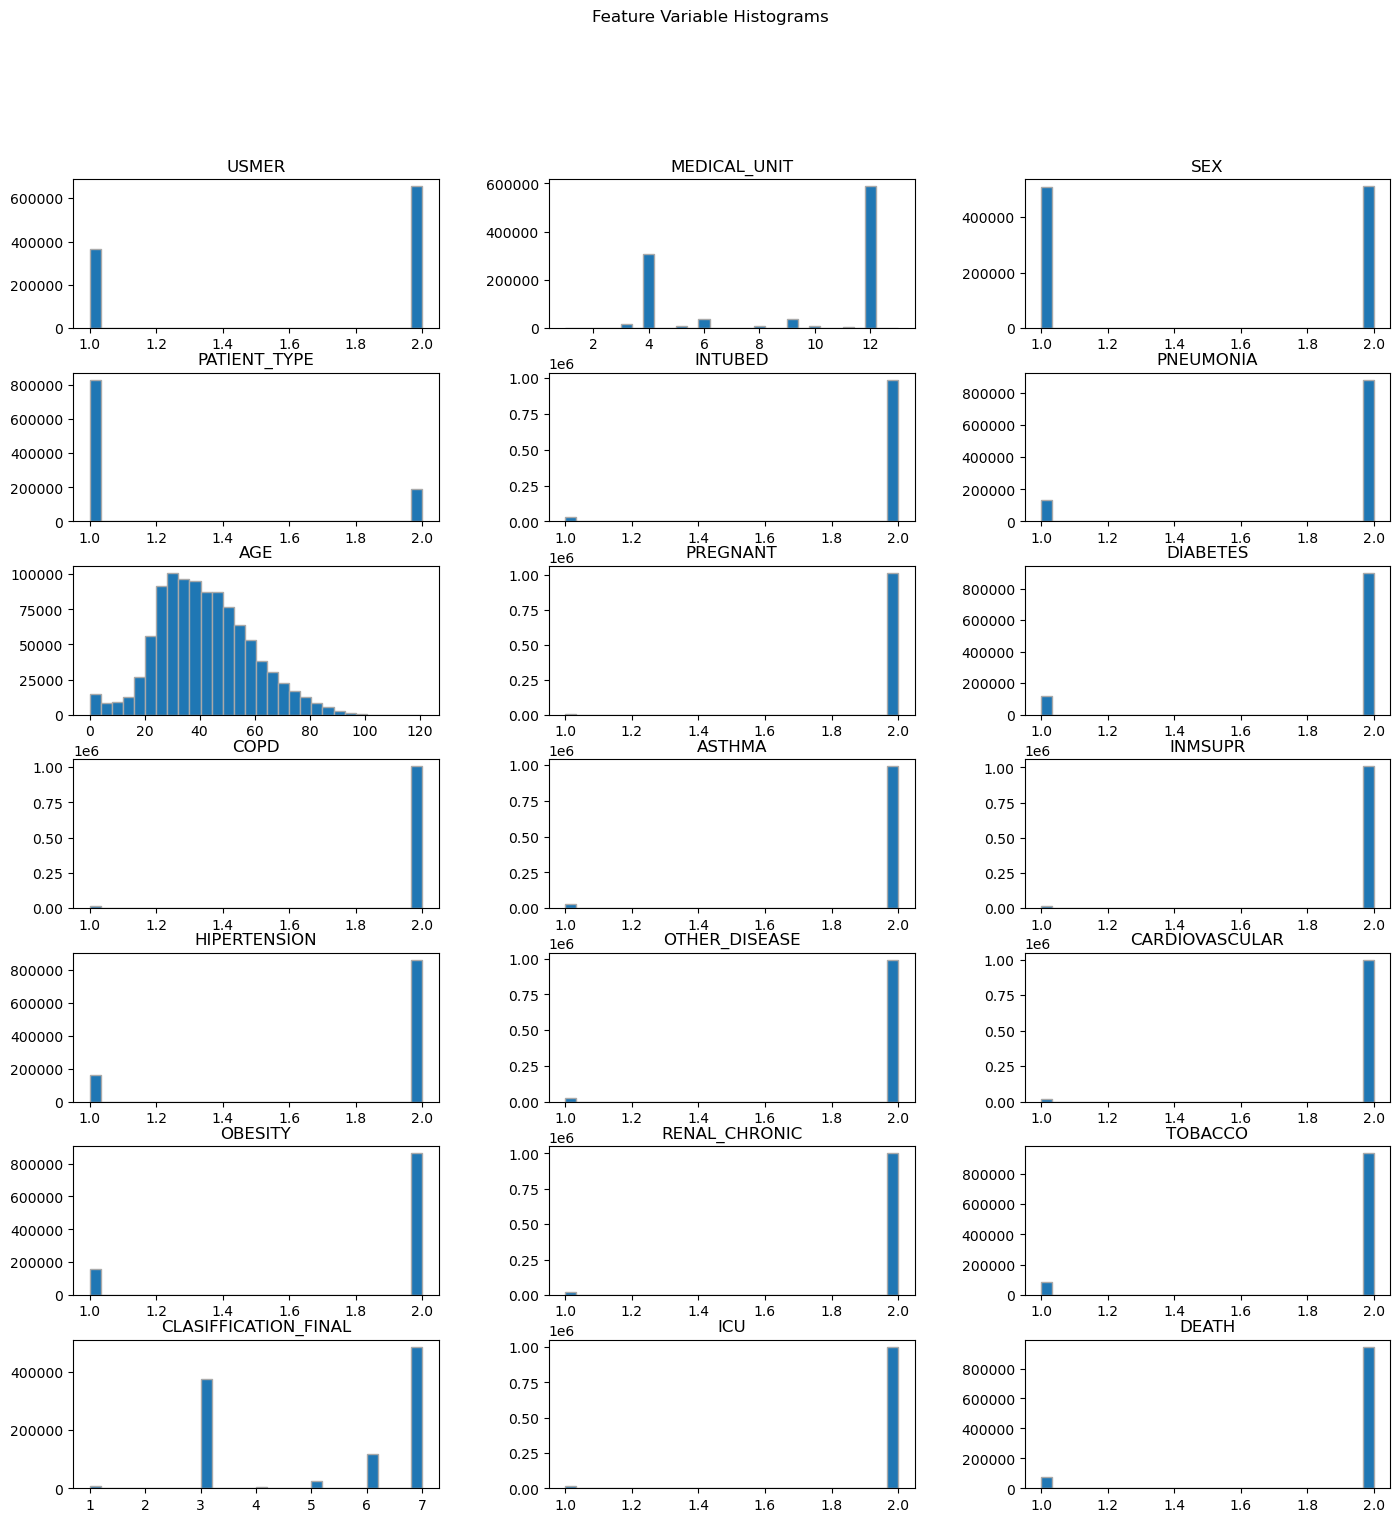

In [17]:
# Create histograms to examine each column in detail
fig, axs = plt.subplots(7, 3, figsize = (17, 17))
covid_data.hist(grid = False, ax = axs, bins = 30, edgecolor = "darkgrey")
plt.suptitle("Feature Variable Histograms")
plt.show()

In [18]:
# Create a dataframe holding the features
cov_df_X = covid_data.loc[:, covid_data.columns != "DEATH"]

# See first 5 rows
print(cov_df_X.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  PREGNANT  \
0      2             1    1             1      2.0        1.0   65       2.0   
1      2             1    2             1      2.0        1.0   72       2.0   
2      2             1    2             2      1.0        2.0   55       2.0   
3      2             1    1             1      2.0        2.0   53       2.0   
4      2             1    2             1      2.0        2.0   68       2.0   

   DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0       2.0   2.0     2.0      2.0           1.0            2.0   
1       2.0   2.0     2.0      2.0           1.0            2.0   
2       1.0   2.0     2.0      2.0           2.0            2.0   
3       2.0   2.0     2.0      2.0           2.0            2.0   
4       1.0   2.0     2.0      2.0           1.0            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0             2.0      2.0          

In [19]:
# Create a dataframe holding the target
cov_df_y = covid_data.loc[:, covid_data.columns == "DEATH"]

# See first 5 rows
print(cov_df_y.head())

   DEATH
0      1
1      1
2      1
3      1
4      1


In [20]:
# Split into 80% train and 20% test set. 
train_x, test_x, train_y, test_y = train_test_split(cov_df_X, cov_df_y, test_size = .2, random_state=0)

# Print the shape of the training data 
print("Training data shape: ", train_x.shape, train_y.shape)

# Print the shape of the test set
print("Test data shape: ", test_x.shape, test_y.shape)

# Reset index of training data 
train_x.reset_index(inplace = True)
train_y.reset_index(inplace = True)

# Drop index column 
train_x = train_x.drop("index", axis = 1)
train_y = train_y.drop("index", axis = 1)

# Repeat for test set
test_x.reset_index(inplace = True)
test_y.reset_index(inplace = True)
test_x = test_x.drop("index", axis = 1)
test_y = test_y.drop("index", axis = 1)

Training data shape:  (815732, 20) (815732, 1)
Test data shape:  (203934, 20) (203934, 1)


In [21]:
# Calculate the correlation coefficient, in this case Pearson's r between the target variable DEATH and the feature variables in the dataset
# Sort by absolute value, since we are trying to see which has the highest value
train_x.corrwith(train_y["DEATH"], method = "pearson").abs().sort_values(ascending=False)

PATIENT_TYPE            0.518350
INTUBED                 0.505314
PNEUMONIA               0.471724
AGE                     0.320600
DIABETES                0.215996
ICU                     0.203441
HIPERTENSION            0.203000
CLASIFFICATION_FINAL    0.195011
MEDICAL_UNIT            0.154632
RENAL_CHRONIC           0.119275
USMER                   0.117816
COPD                    0.088842
SEX                     0.079261
CARDIOVASCULAR          0.075169
OTHER_DISEASE           0.056854
OBESITY                 0.056175
INMSUPR                 0.050158
PREGNANT                0.021320
ASTHMA                  0.017450
TOBACCO                 0.005869
dtype: float64

In [22]:
# If we use 0.30 as an arbitrary cutoff, then there are only 7 features that are significant enough
# Use SelectKBest to pick these features and make a multivariate linear regression model
best_feat = SelectKBest(score_func = f_regression, k = 4).fit(train_x, train_y["DEATH"])
print("F-statistic for each feature:\n ", best_feat.scores_)

# This code below from:
# https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
cols_selected = best_feat.get_support(indices = True)
print("Selected indices:", cols_selected)
print(train_x.iloc[:,cols_selected].head())

F-statistic for each feature:
  [1.14821424e+04 1.99828536e+04 5.15706786e+03 2.99702334e+05
 2.79712178e+05 2.33472150e+05 9.34495019e+04 3.70943792e+02
 3.99198256e+04 6.48964136e+03 2.48468393e+02 2.05737383e+03
 3.50602953e+04 2.64527347e+03 4.63532273e+03 2.58230716e+03
 1.17725727e+04 2.81018672e+01 3.22481260e+04 3.52192504e+04]
Selected indices: [3 4 5 6]
   PATIENT_TYPE  INTUBED  PNEUMONIA  AGE
0             1      2.0        2.0   73
1             2      1.0        1.0   62
2             1      2.0        2.0    5
3             1      2.0        2.0   43
4             1      2.0        2.0   39


In [23]:
# Fit model
multivar_reg = LinearRegression(fit_intercept = True).fit(train_x.iloc[:, cols_selected], train_y["DEATH"])

# Print coefficients of fitted model 
print(multivar_reg.coef_)
print(multivar_reg.intercept_)

[-0.1584083   0.49010168  0.12283368 -0.00220598]
1.0145852017614359


The equation of the fitted model is in the form: y = -0.1584x1 + 0.4901x2 + 0.1228x3 - 0.0022x4 + 1.0146

Remember that a 1 in DEATH means that a patient died, and a 2 means the patient survived. When all other variables are held constant, chance of survival decreases by 0.1584 points when a patient is hospitalized. When all other variables are held constant, chance of survival increases by 0.4901 points when a patient is put on a ventilator. When all other variables are held constant, chance of survival increases by 0.1228 when a patient has pneumonia. When all other variables are held constant, chance of survival decreases by 0.0022 points for each 1 year increase in patient age. When all four features are 0, the chance of survival has a score of 1.0146.

In [24]:
# Create a NumPy array from test data so don't have to use values.reshape(-1,1) every time
hv_test_y = test_y["DEATH"].values.reshape(-1,1)

# Make prediction using the test set 
pred_y = multivar_reg.predict(test_x.iloc[:, cols_selected])

# Calculate MSE
mse_test = mean_squared_error(hv_test_y, pred_y)
print(mse_test)

# Calculate RMSE
rmse_test = mean_squared_error(hv_test_y, pred_y, squared = False)
print(rmse_test)

# Calcualte R2
r2_test = r2_score(hv_test_y, pred_y)
print(r2_test)

0.0390487765960957
0.1976076329398632
0.4128004857673351


The MSE is 0.0390, the RMSE is 0.1976, and the R2 is 0.4128. This means that this model isn't that good. This is possibly because it only uses the top 4 features, when using all of them may result in a higher accuracy. Another reason is that this model uses Boolean features represented as numbers, whereas meaningful numbers would've increased the accuracy. 